# Titanic Survival Predictions 
Vamos a explorar todo el proceso de creación de un modelo de aprendizaje automático con el famoso [conjunto de datos Titanic](https://www.kaggle.com/c/titanic/data). En los datos podemos encontrar información sobre el destino de los pasajeros del Titanic resumida según la situación económica (clase), sexo, edad y supervivencia.

El objetivo de este desafio es predecir si un pasajero del Titanic sobrevivira o no.


### Contenido:
1. Diccionario de datos.
2. Import de librerias necesarias
3. Lectura y exploración de datos
4. Análisis preliminar de datos
5. Visualización de datos
6. Limpieza de datos
7. Comparación y elección de modelo
8. Export resultados



## 1)Data Dictionary
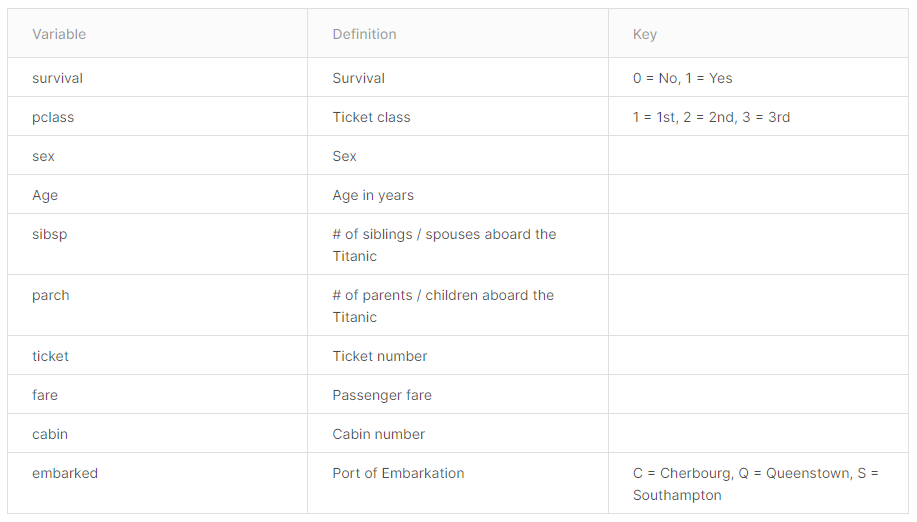

### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## 2) Import de librerias necesarias
Primero importamos los módulos que utilizaremos para este desafio. A grandes rasgos las clasificamos en dos grupos: Librerias para analisis de datos y de visualización.

In [ ]:
#data analysis 
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 3) Lectura y exploración de datos
Cargamos los datasets: uno de entrenamiento y otro de testeo utilizando los módulos provistos por pandas. Utilizamos la funcion `describe()` para tener un vistazo general del archivo de entrenamiento.

In [ ]:
#import train and test CSV files
train = pd.read_csv("/content/input/train.csv")
test = pd.read_csv("/content/input/test.csv")

#take a look at the training data
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Givard, Mr. Hans Kristensen",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 4) Análisis de datos
Exploración del dataset: listado de  columnas(posibles features), obtención de muestra, chequeo de tipos de datos, etc.

In [ ]:
#listado de columnas/features del dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
#tomamos una muestra de 5 registros
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,NaN,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q


* **Numerical Features:** Age (Continua), Fare (Continua), SibSp (Discreta), Parch (Discreta)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin

#### Tipos de datos para c/u
* Survived: int
* Pclass: int
* Name: string
* Sex: string
* Age: float
* SibSp: int
* Parch: int
* Ticket: string
* Fare: float
* Cabin: string
* Embarked: string



In [ ]:
#Resumen del dataset
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Givard, Mr. Hans Kristensen",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Algunas observaciones:
* Hay un total de 891 pasajeros en el set de entrenamieto.
* Para age(edad) tenemos un 20% de datos faltantes.
* Para Cabin(cabina) tenemos un faltante de aproximadamente el 77% de los datos.
* Para Embarked(embarque) solo tenemos un  0.22% de faltantes.

In [ ]:
#Vemos si hay mas faltantes que no detectamos
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


No hay nulos mas alla de los detectados.

## 5) Visualización de datos
Vamos a gráficar los datos para visualizarlos y poder sacar algunas conclusiones preliminares.

### Sexo

Porcentaje de mujeres que sobrevivieron: 74.20382165605095
Porcentaje de hombres que sobrevivieron: 18.890814558058924


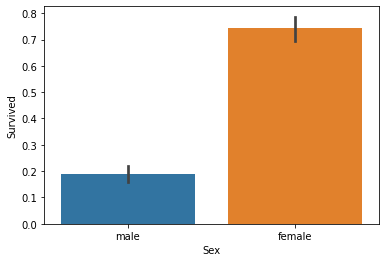

In [ ]:
#gráfico de barras por sexo
sns.barplot(x="Sex", y="Survived", data=train)

#print porcentaje de hombres vs mujeres que sobrevivieron
print("Porcentaje de mujeres que sobrevivieron:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Porcentaje de hombres que sobrevivieron:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Las mujeres tienen una mayor chance de sobrevivir que los hombres. El sexo es determinante para nuestras predicciones.

### Pclass

% de Pclass = 1 que sobrevivieron: 62.96296296296296
% de Pclass = 2 que sobrevivieron: 47.28260869565217
% de Pclass = 3 que sobrevivieron: 24.236252545824847


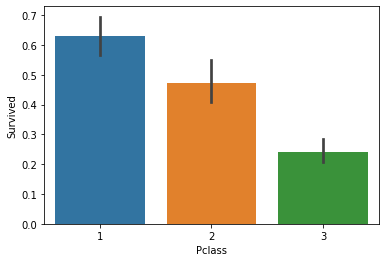

In [ ]:
#grafico de barras segun Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print procentaje de personas por clase que sobrevivieron
print("% de Pclass = 1 que sobrevivieron:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("% de Pclass = 2 que sobrevivieron:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("% de Pclass = 3 que sobrevivieron:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Cuanto mejor es la clase mayor es la probabilidad de sobrevivir (62.9% vs. 47.3% vs. 24.2%)

### SibSp

% SibSp = 0 que sobrevivieron: 34.53947368421053
% SibSp = 1 que sobrevivieron: 53.588516746411486
% SibSp = 2 que sobrevivieron: 46.42857142857143


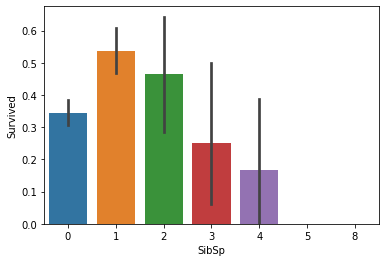

In [ ]:
#grafico de barras por SibSp vs. sobrevivir
sns.barplot(x="SibSp", y="Survived", data=train)

#print de algunos porcentajes
print("% SibSp = 0 que sobrevivieron:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("% SibSp = 1 que sobrevivieron:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("% SibSp = 2 que sobrevivieron:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

Las personas con mas hermanos o esposas tienen menos chances de sobrevivir. La gente sin hermanos y/o esposas tienen menos chance de sobrevivir que aquellos con una o dos (34.5% vs 53.4% vs. 46.4%)

### Parch

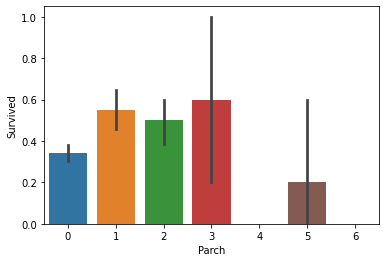

In [ ]:
#grafico de barras Parch vs. sobrevivio
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

Las personas con menos de cuatro padres/hijos tienen mas chances de sobrevivir que aquellos con cuatro o mas. Igual que en el caso anterior, la gente que viaja sola tiene menos chances de sobrevivir que aquellos con 1 a 3 padres o hijos.

### Age

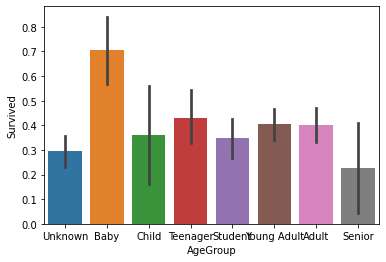

In [ ]:
#Agrupamos la edad en categorias
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#grafico de barras Age vs. sobrevivio
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Los bebes tienen mas chances de sobrevivir que cualquier otro grupo

### Cabin


Porcentaje de CabinBool = 1 que sobrevivieron: 66.66666666666666
Porcentaje de CabinBool = 0 que sobrevivieron: 29.985443959243085


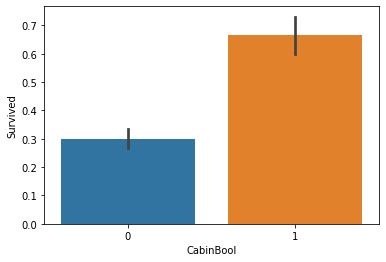

In [ ]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#print CabinBool vs. survived
print("Porcentaje de CabinBool = 1 que sobrevivieron:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Porcentaje de CabinBool = 0 que sobrevivieron:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

#grafico de barras CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

Las personas con un numero de cabina tienen mas posibilidades de supervivencia.(66.6% vs 29.9%)

## 5) Limpieza de datos
Limpieza de valores faltantes e información innecesaria 

### Test Data

In [ ]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Brobeck, Mr. Karl Rudolf",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


* Hay 418 pasajeros.
* Falta 1 dato para Fare.
* Faltan aprox un 20% de edades.

### Cabin Feature

In [ ]:
#Eliminamos la columna de cabina ya que no la utilizaremos
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

### Ticket Feature

In [ ]:
#eliminamos la columna ticket ya que no la utilizaremos
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

### Embarked Feature

In [ ]:
#completando valores faltantes en embarked
print("Cantidad de personas que embarcaron en Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Cantidad de personas que embarcaron en Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Cantidad de personas que embarcaron en Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Cantidad de personas que embarcaron en Southampton (S):
644
Cantidad de personas que embarcaron en Cherbourg (C):
168
Cantidad de personas que embarcaron en Queenstown (Q):
77


Ya que la mayoria de las presonas embarco en Southampton, vamos a asumier que los faltantes son de ahi.

In [ ]:
#reemplazamos nulos en  Embarked con  S
train = train.fillna({"Embarked": "S"})  

### Age Feature

Next we'll fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages. 

In [ ]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [ ]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


The code I used above is from [here](https://www.kaggle.com/startupsci/titanic-data-science-solutions). Next, we'll try to predict the missing Age values from the most common age for their Title.

In [ ]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

Now that we've filled in the missing values at least *somewhat* accurately (I will work on a better way for predicting missing age values), it's time to map each age group to a numerical value.

In [ ]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

### Name Feature
We can drop the name feature now that we've extracted the titles.

In [ ]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### Sex Feature

In [ ]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


### Embarked Feature

In [ ]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


### Fare Feature
It's time separate the fare values into some logical groups as well as filling in the single missing value in the test dataset.

In [ ]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [ ]:
#check train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [ ]:
#check test data
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


## 6) Choosing the Best Model

### Splitting the Training Data
Usamos parte de nuestro set de entrenamiento(22%) para evaluar los diferentes modelos

In [ ]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

### Testing Different Models
Vamos a probar los siguientes modelos (lista [aca](http://https://www.kaggle.com/startupsci/titanic-data-science-solutions)):
* Gaussian Naive Bayes
* Logistic Regression
* Support Vector Machines
* Perceptron
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors
* Stochastic Gradient Descent
* Gradient Boosting Classifier

Cada modelo, va a entrenarse con el 80% de los datos de entrenamiento y usamos el 20% restante para predecir y poder observar la precision.

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.7


In [ ]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [ ]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.17


In [ ]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

78.68


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

81.22


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

84.26


In [ ]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

77.66


In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

79.19


In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.77


Compramos la precision de cada modelo

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.77
3,Random Forest,84.26
0,Support Vector Machines,82.74
7,Decision Tree,81.22
2,Logistic Regression,79.70
8,Stochastic Gradient Descent,79.19
4,Naive Bayes,78.68
5,Perceptron,78.68
6,Linear SVC,78.17
1,KNN,77.66


Gradient Boosting Classifier va a ser el modelo que utilizaremos.

## Sources:
* [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
* [Scikit-Learn ML from Start to Finish](https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish?scriptVersionId=320209)

